<a href="https://colab.research.google.com/github/KonungurProFer/Proyecto_telecom_X/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

##1. Carga de Datos y Librerías

In [911]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_json("https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json")

In [912]:
print(f"   Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")

   Dimensiones: 7267 filas x 6 columnas


##1.2 Conociendo los datos

### 📊 Diccionario de Datos - TelecomX LATAM

## Descripción General

Este diccionario contiene la información detallada de todas las variables presentes en el dataset de TelecomX.

---

## 📋 Variables del Dataset

### 1️⃣ Identificación del Cliente

- **`customerID`**: número de identificación único de cada cliente


### 2️⃣ Cancelación del Servicio

- **`Churn`**: si el cliente dejó o no la empresa
  - `Yes` o `No`


### 3️⃣ Información del Cliente (`customer`)

- **`gender`**: género (masculino y femenino)
  - `Male` o `Female`

- **`SeniorCitizen`**: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
  - `0` = No
  - `1` = Sí

- **`Partner`**: si el cliente tiene o no una pareja
  - `Yes` o `No`

- **`Dependents`**: si el cliente tiene o no dependientes
  - `Yes` o `No`

- **`tenure`**: meses de contrato del cliente
  - Valor numérico en meses


### 4️⃣ Servicios de Telefonía (`phone`)

- **`PhoneService`**: suscripción al servicio telefónico
  - `Yes` o `No`

- **`MultipleLines`**: suscripción a más de una línea telefónica
  - `Yes`, `No` o `No phone service`


### 5️⃣ Servicios de Internet (`internet`)

- **`InternetService`**: suscripción a un proveedor de internet
  - `DSL`, `Fiber optic`, `No`

- **Servicios adicionales**:
  - **`OnlineSecurity`**: suscripción adicional de seguridad en línea
  - **`OnlineBackup`**: suscripción adicional de respaldo en línea
  - **`DeviceProtection`**: suscripción adicional de protección del dispositivo
  - **`TechSupport`**: suscripción adicional de soporte técnico, menor tiempo de espera
  - **`StreamingTV`**: suscripción de televisión por cable
  - **`StreamingMovies`**: suscripción de streaming de películas


### 6️⃣ Información de la Cuenta (`account`)

- **`Contract`**: tipo de contrato
  - `Month-to-month`, `One year`, `Two year`

- **`PaperlessBilling`**: si el cliente prefiere recibir la factura en línea
  - `Yes` o `No`

- **`PaymentMethod`**: forma de pago
  - `Bank transfer`, `Credit card`, `Electronic check`, `Mailed check`

- **`Charges.Monthly`**: total de todos los servicios del cliente por mes
  - Valor numérico

- **`Charges.Total`**: total gastado por el cliente
  - Valor numérico

---

## 📌 Notas Importantes

- Las variables categóricas utilizan principalmente valores binarios (`Yes`/`No`) o categorías específicas
- Los valores numéricos incluyen `tenure`, `Charges.Monthly` y `Charges.Total`
- `SeniorCitizen` es la única variable que usa codificación numérica binaria (0/1) en lugar de texto
- Algunas variables de servicios pueden tener el valor `No internet service` o `No phone service` cuando el cliente no tiene el servicio base correspondiente.

##1.3 Vista Inicial de los Datos

In [913]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [914]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

##2. Desanidado de Datos JSON

In [915]:
#Normalizando
df_customer=pd.json_normalize(df["customer"])
df_phone=pd.json_normalize(df["phone"])
df_internet=pd.json_normalize(df["internet"])
df_account=pd.json_normalize(df["account"])

In [916]:
# Concatenar todos los dataframes normalizados
df_normalizado= pd.concat([df[["customerID","Churn"]], df_customer, df_phone, df_internet, df_account], axis=1)
pd.set_option('display.max_columns', None)
df_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [917]:
print(f"   Dimensiones finales: {df_normalizado.shape[0]} filas x {df_normalizado.shape[1]} columnas")

   Dimensiones finales: 7267 filas x 21 columnas


In [918]:
df_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


##2.2 Exploración del Dataset Normalizado

In [919]:
# Información detallada
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [920]:
#Verificando que valores tenemos
for col in df_normalizado.columns:
    print(df_normalizado[col].unique())

['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
['No' 'Yes' '']
['Female' 'Male']
[0 1]
['Yes' 'No']
['Yes' 'No']
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
['Yes' 'No']
['No' 'Yes' 'No phone service']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['One year' 'Month-to-month' 'Two year']
['Yes' 'No']
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
[65.6  59.9  73.9  ... 91.75 68.8  67.85]
['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


##2.3 Verificación de Nulos

In [921]:
#Verificando que no exista nulos
df_normalizado.isna().sum().rename("Nulos")

,Nulos
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


##2.4 Verificación de Duplicados

In [922]:
datos_duplicados = df_normalizado.duplicated().sum()
print(f"Registros duplicados: {datos_duplicados}")


Registros duplicados: 0


###Detección de problemas

In [923]:
df_normalizado["Churn"].unique()

array(['No', 'Yes', ''], dtype=object)

In [924]:
df_normalizado=df_normalizado.query('Churn!=""')

In [925]:
# Buscar valores no numéricos en Charges.Total
df_normalizado[~df_normalizado['Charges.Total'].astype(str).str.contains(r'^-?\d*\.?\d+$')].head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,


In [926]:
df_normalizado=df_normalizado[df_normalizado['Charges.Total'].astype(str).str.contains(r'^-?\d*\.?\d+$')]

In [927]:
#Creando la columna cuentas diarias
df_normalizado["Cuentas_diarias"]=(df_normalizado['Charges.Monthly']/30).round(3)

In [928]:
columnas_tf= ["Churn",
              "Partner",
              "Dependents",
              "PaperlessBilling",
              "OnlineSecurity",
              "OnlineBackup",
              "DeviceProtection",
              "TechSupport",
              "StreamingTV",
              "StreamingMovies",
              "PhoneService",
              "MultipleLines"]

In [929]:
#Ajustando datos
ajustando_tf= df_normalizado[columnas_tf]
for var in ajustando_tf.columns:
  df_normalizado[var]=df_normalizado[var].apply(lambda x: x.replace("No internet service", "0").replace("No phone service", "0").replace("No", "0").replace("Yes", "1"))


In [930]:
df_normalizado

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.60,593.3,2.187
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.4,1.997
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.267
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.4,2.797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,1,0,0,1,0,0,One year,0,Mailed check,55.15,742.9,1.838
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.7,2.837
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,0,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.677
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,1,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.262


##2.5 Conversión de Tipo de Datos

In [931]:
df_normalizado[columnas_tf]=df_normalizado[columnas_tf].astype(np.int64)
df_normalizado['Charges.Total']=df_normalizado["Charges.Total"].astype(np.float64)

In [932]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   int64  
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   int64  
 5   Dependents        7032 non-null   int64  
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   int64  
 8   MultipleLines     7032 non-null   int64  
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   int64  
 11  OnlineBackup      7032 non-null   int64  
 12  DeviceProtection  7032 non-null   int64  
 13  TechSupport       7032 non-null   int64  
 14  StreamingTV       7032 non-null   int64  
 15  StreamingMovies   7032 non-null   int64  
 16  Contract          7032 non-null   object 
 17  

##2.6 Reorganizando

In [933]:
name_columns= {"customerID": "ID",
               "Churn": "Abandonó_Servicio",
               "gender": "Género",
               "SeniorCitizen": "Cliente_Señor",
               "Partner": "Tiene_Pareja",
               "Dependents": "Tiene_Dependientes",
               "tenure": "Antigüedad",
               "PhoneService": "Servicio_Telefónico",
               "MultipleLines": "Múltiples_Líneas",
               "InternetService": "Servicio_Internet",
               "OnlineSecurity": "Seguridad_Online",
               "OnlineBackup": "Respaldo_Online",
               "DeviceProtection": "Protección_Dispositivo",
               "TechSupport": "Soporte_Técnico",
               "StreamingTV": "TV_Streaming",
               "StreamingMovies": "Películas_Streaming",
               "Contract": "Tipo_Contrato",
               "PaperlessBilling": "Facturación_Sin_Papel",
               "PaymentMethod": "Método_Pago",
               "Charges.Monthly": "Cargo_Mensual",
               "Charges.Total": "Cargo_Total",
               "Cuentas_diarias": "Cargo_Diario"}

In [934]:
df_normalizado=df_normalizado.rename(columns=name_columns)

In [935]:
df_normalizado.sample(6)

,ID,Abandonó_Servicio,Género,Cliente_Señor,Tiene_Pareja,Tiene_Dependientes,Antigüedad,Servicio_Telefónico,Múltiples_Líneas,Servicio_Internet,Seguridad_Online,Respaldo_Online,Protección_Dispositivo,Soporte_Técnico,TV_Streaming,Películas_Streaming,Tipo_Contrato,Facturación_Sin_Papel,Método_Pago,Cargo_Mensual,Cargo_Total,Cargo_Diario
5378,7343-EOBEU,0,Male,0,1,0,3,1,1,No,0,0,0,0,0,0,Month-to-month,1,Mailed check,23.60,89.05,0.787
6753,9309-BZGNT,0,Male,1,1,0,69,0,0,DSL,0,0,1,0,0,0,One year,1,Credit card (automatic),29.80,2134.30,0.993
4673,6400-BWQKW,1,Female,0,0,0,6,1,1,Fiber optic,1,0,0,0,0,0,Month-to-month,1,Electronic check,79.05,434.50,2.635
2120,2978-XXSOG,0,Female,0,0,0,22,1,1,DSL,1,0,0,1,0,0,Month-to-month,1,Mailed check,59.05,1253.50,1.968
1201,1716-LSAMB,0,Male,0,1,1,45,1,0,DSL,1,0,0,1,0,0,Two year,0,Bank transfer (automatic),54.65,2553.70,1.822
1817,2587-YNLES,0,Female,0,1,1,6,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.10,100.35,0.670


In [936]:
#Verificando que valores tenemos
for col in df_normalizado.columns:
    print(df_normalizado[col].unique())

['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
[0 1]
['Female' 'Male']
[0 1]
[1 0]
[1 0]
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
[1 0]
[0 1]
['DSL' 'Fiber optic' 'No']
[0 1]
[1 0]
[0 1]
[1 0]
[1 0]
[0 1]
['One year' 'Month-to-month' 'Two year']
[1 0]
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
[65.6  59.9  73.9  ... 91.75 68.8  67.85]
[ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]
[2.187 1.997 2.463 ... 3.058 2.293 2.262]


In [937]:
name_values={"Female":"Femenino",
             "Male":"Masculino",
             "Fiber optic":"Fibra optica",
             "One year":"Anual",
             "Month-to-month":"Mensual",
             "Two year":"Bienal",
             "Mailed check": "Cheque enviado por correo",
             "Electronic check": "Cheque electrónico",
             "Credit card (automatic)": "Tarjeta de crédito (automático)",
             "Bank transfer (automatic)": "Transferencia bancaria (automática)"}

In [938]:
df_normalizado.replace(name_values, inplace=True)

In [939]:
df_normalizado.sample(3)

,ID,Abandonó_Servicio,Género,Cliente_Señor,Tiene_Pareja,Tiene_Dependientes,Antigüedad,Servicio_Telefónico,Múltiples_Líneas,Servicio_Internet,Seguridad_Online,Respaldo_Online,Protección_Dispositivo,Soporte_Técnico,TV_Streaming,Películas_Streaming,Tipo_Contrato,Facturación_Sin_Papel,Método_Pago,Cargo_Mensual,Cargo_Total,Cargo_Diario
1436,2067-QYTCF,0,Femenino,0,1,0,64,1,1,Fibra optica,0,1,1,1,1,1,Mensual,1,Cheque electrónico,111.15,6953.40,3.705
4523,6199-IPCAO,0,Femenino,0,1,1,29,1,1,No,0,0,0,0,0,0,Bienal,0,Cheque enviado por correo,26.10,692.55,0.870
1908,2696-ECXKC,0,Femenino,0,1,1,55,1,1,Fibra optica,1,0,0,0,1,1,Anual,0,Cheque enviado por correo,100.90,5448.60,3.363


In [940]:
#Verificando que el indice este correcto
df_normalizado.index.equals(pd.RangeIndex(start=0, stop=len(df_normalizado), step=1))

False

In [941]:
#Reseteando índice
df_normalizado.reset_index(drop=True, inplace=True)

In [942]:
#Verificando que el indice este correcto
df_normalizado.index.equals(pd.RangeIndex(start=0, stop=len(df_normalizado), step=1))

True

#📊 Carga y análisis

##3 **Análisis descriptivo**<br>
Con el método describe, podemos ver las estadísticas descriptivas de nuestro DF. El análisis descriptivo ayuda con la comprensión de la distribución y el comportamiento de los clientes de Telecom X.

Se hará foco en la media (mean), mediana(50% o segundo cuartil) y desviación estándar(std).

In [943]:
df_describe=df_normalizado.describe().T

In [944]:
estilo_descripcion = df_describe.style
estilo_descripcion.format({"count": "{:.0f}",
                           "mean": "{:.2%}",
                           "std": "{:.2%}",
                           "25%": "{:.2%}",
                           "50%": "{:.2%}",
                           "75%": "{:.2%}",
                           "max": "{:.2f}",
                           "min": "{:.2f}"
                        })


,count,mean,std,min,25%,50%,75%,max
Abandonó_Servicio,7032,26.58%,44.18%,0.00,0.00%,0.00%,100.00%,1.00
Cliente_Señor,7032,16.24%,36.88%,0.00,0.00%,0.00%,0.00%,1.00
Tiene_Pareja,7032,48.25%,49.97%,0.00,0.00%,0.00%,100.00%,1.00
Tiene_Dependientes,7032,29.85%,45.76%,0.00,0.00%,0.00%,100.00%,1.00
Antigüedad,7032,3242.18%,2454.53%,1.00,900.00%,2900.00%,5500.00%,72.00
Servicio_Telefónico,7032,90.33%,29.56%,0.00,100.00%,100.00%,100.00%,1.00
Múltiples_Líneas,7032,42.19%,49.39%,0.00,0.00%,0.00%,100.00%,1.00
Seguridad_Online,7032,28.65%,45.22%,0.00,0.00%,0.00%,100.00%,1.00
Respaldo_Online,7032,34.49%,47.54%,0.00,0.00%,0.00%,100.00%,1.00
Protección_Dispositivo,7032,34.39%,47.50%,0.00,0.00%,0.00%,100.00%,1.00


**Observaciones Clave:**


*   La mayoría de servicios tiene adopción entre 29-48% (streaming, protecciones, soporte)
*   Servicio Telefónico: muy alta adopción (90.33%)
*   Facturación Sin Papel: mayoría usa este método (59.27%)
*   Churn: 26.58% de abandono - tasa significativa para atender
*   Solo 16.24% son clientes senior
*   48.25% tiene pareja
*   29.85% tiene dependientes
*   Media de 32 meses con alta variabilidad (std: 2454)
*   Rango muy amplio: 1 a 72 meses
*   Mensual: promedio \$64.80 (rango: \$18.25 - \$118.75)
*   Total: promedio \$2,283 (alta variación: \$16.80 - \$8,684)

**Conclusiones generales de lo interpretado:**
*   Alta variabilidad en antigüedad y gastos sugiere diferentes segmentos de
clientes.
*   La tasa de abandono del 26.58% requiere atención inmediata.
*   Existe oportunidad de retener clientes de alto valor con antigüedad prolongada.

##3.2 Distribución de evasión (Churn) de los clientes

In [956]:
df_evasion=df_normalizado['Abandonó_Servicio'].value_counts(normalize=True).rename(index={1:"Si",0:"No"})*100
df_evasion

,proportion
Abandonó_Servicio,
No,73.421502
Si,26.578498


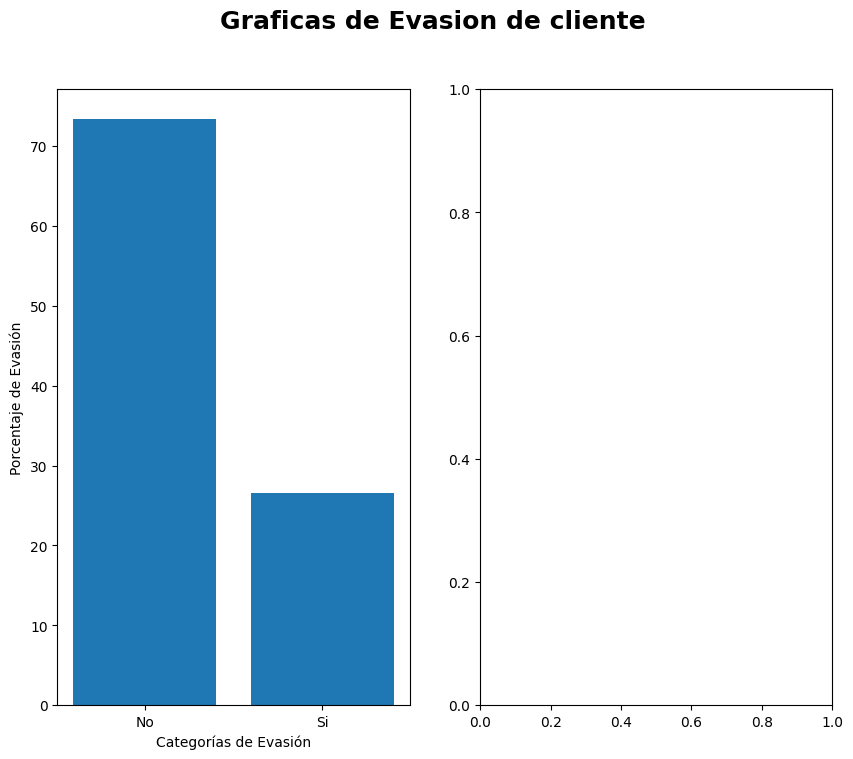

In [972]:
fig, axs =plt.subplots(1,2, figsize=(10,8))
fig.suptitle("Graficas de Evasion de cliente", fontsize=18, fontweight="bold")
axs[0].bar(df_evasion.index, df_evasion.values)
axs[0].set_ylabel("Porcentaje de Evasión")
axs[0].set_xlabel("Categorías de Evasión")

plt.show()

#📄Informe final